In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import ReadTypeAndConfigCounter

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'results/frequencies_of_interaction configurations'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Frequencies of interaction configurations

In this notebook, we determine the frequencies of the four types of mapped paired-end reads and the ten configurations across interactions of an interaction file generated with `UICer.py`, i.e., the interactions have already been classified as balanced or unbalanced. In order to keep the layout clear we have outsourced functions for counting and plotting to a separate module.

In [2]:
rtac_Counter = ReadTypeAndConfigCounter()

## Loading interaction data

### Choose a file

In [3]:
AUTHOR = 'MIF' # JAV, SCH, MIF
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'GM12878' # MK, ERY, NEU, MON, MAC_M0, ..., , MESC, GM12878
OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz' 

### Read interactions into data structure

In [4]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../UICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Set size: 1,892,588
[INFO] ... done.


## Overall frequencies of the four mapped paired-end read orientations

In paired-end sequencing, four relative orientations of paired-end reads can be distinguished after mapping:

1. The reads are mapped to different strands and point to each other (class `0`)
2. The reads are mapped to different strands and point away from each other (class `1`)
3. The reads both are mapped to the forward strand (class `2`)
4. The reads both are mapped to the reverse strand (class `3`)

Here we determine the frequencies of the four relative orientations across all interactions as well as across all unbalanced and balanced interactions.

### Count reads separately by orientation

In [7]:
RP_TYPE_FREQ_DICT, RP_TYPE_DENS_DICT = rtac_Counter.count_read_types(d11_interaction_set)

### Output frequencies as a table

In [8]:
rtac_Counter.print_read_type_frequency_tables(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    print_dens=True)

U
		T0	T1	T2	T3
	NN: 	0.28	0.22	0.20	0.30
	EE: 	0.26	0.22	0.27	0.24
	NE: 	0.24	0.26	0.26	0.24
	EN: 	0.29	0.21	0.28	0.22
	ALL: 	0.26	0.24	0.27	0.23

B
		T0	T1	T2	T3
	NN: 	0.26	0.24	0.25	0.25
	EE: 	0.25	0.24	0.26	0.25
	NE: 	0.25	0.26	0.25	0.25
	EN: 	0.26	0.24	0.26	0.24
	ALL: 	0.25	0.25	0.26	0.24

ALL
		T0	T1	T2	T3
	NN: 	0.27	0.22	0.22	0.29
	EE: 	0.25	0.23	0.27	0.25
	NE: 	0.24	0.26	0.26	0.24
	EN: 	0.27	0.23	0.27	0.23
	ALL: 	0.26	0.24	0.26	0.24



### Output frequencies as a bar chart

Use `NN`, `NE`, `EN` or `EE` to plot the frequencies of specific enrichment categories. Use `ALL` to plot the frequencies across all enrichment categories.

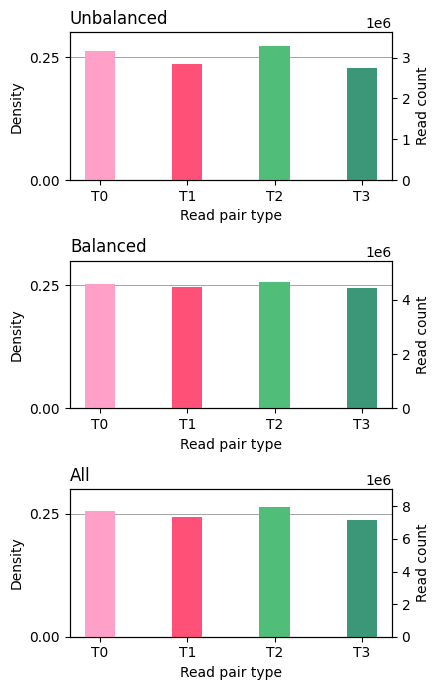

In [9]:
fig = rtac_Counter.create_read_type_frequency_bar_charts(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    e_cat = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_rp_type_frequency_bar_charts.pdf')

## Frequencies of configurations

We distinguish ten configurations of interactions (`0X`, `1X`, `2X`, `3X`, `01`, `02`, `03`, `12`, `13`, `23`), depending on which of the four relative orientations of mapped paired-end reads predominate within individual interactions.

### Count interactions separately by configuration

In [10]:
CONF_FREQ_DICT, CONF_DENS_DICT = rtac_Counter.count_configurations(d11_interaction_set)

### Output frequencies as a table

In [11]:
rtac_Counter.print_configuration_frequency_tables(
    conf_freq_dict = CONF_FREQ_DICT,
    conf_dens_dict = CONF_DENS_DICT,
    i_cats = ['U', 'B', 'ALL'])

U
		NN		EE		NE		EN		ALL
	0X: 	145 (0.05)	880 (0.02)	9,156 (0.03)	11,945 (0.04)	22,126 (0.03)
	1X: 	93 (0.03)	699 (0.02)	10,896 (0.04)	8,394 (0.03)	20,082 (0.03)
	2X: 	104 (0.04)	976 (0.03)	10,794 (0.03)	11,053 (0.04)	22,927 (0.03)
	3X: 	155 (0.05)	906 (0.02)	9,015 (0.03)	8,996 (0.03)	19,072 (0.03)
	01: 	3 (0.00)	259 (0.01)	1,639 (0.01)	1,772 (0.01)	3,673 (0.01)
	02: 	548 (0.19)	10,035 (0.26)	16,463 (0.05)	139,530 (0.44)	166,576 (0.25)
	03: 	816 (0.28)	8,613 (0.22)	108,134 (0.35)	16,820 (0.05)	134,383 (0.20)
	12: 	408 (0.14)	8,575 (0.22)	127,236 (0.41)	15,495 (0.05)	151,714 (0.23)
	13: 	632 (0.22)	7,335 (0.19)	15,871 (0.05)	98,290 (0.31)	122,128 (0.18)
	23: 	2 (0.00)	455 (0.01)	1,550 (0.00)	1,634 (0.01)	3,641 (0.01)
B
		NN		EE		NE		EN		ALL
	0X: 	11 (0.01)	102 (0.00)	774 (0.00)	996 (0.00)	1,883 (0.00)
	1X: 	5 (0.00)	79 (0.00)	930 (0.00)	745 (0.00)	1,759 (0.00)
	2X: 	10 (0.01)	133 (0.00)	921 (0.00)	885 (0.00)	1,949 (0.00)
	3X: 	11 (0.01)	101 (0.00)	712 (0.00)	767 (0.00)	1,591 (0.00)
	01: 

### Output frequencies as a bar chart

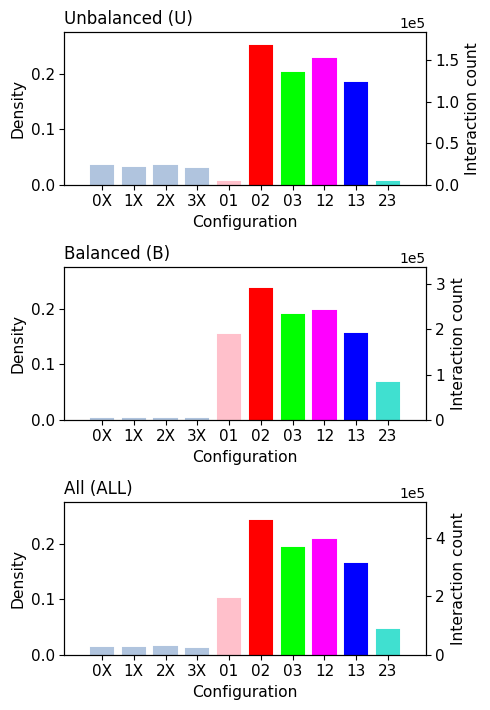

In [12]:
# Use this method for Hi-C datasets
fig = rtac_Counter.create_configuration_frequency_bar_charts(
    i_cats = ['U', 'B', 'ALL'],
    conf_freq_dict = CONF_FREQ_DICT,
    e_cat_1 = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts.pdf')

### Output frequencies as a bar chart with two bars for each configuration

For capture Hi-C data, we can distinguish interactions by enrichment states, i.e., whether interaction go from the baited digest towards 5' (`NE`) or 3' (`EN`) direction.

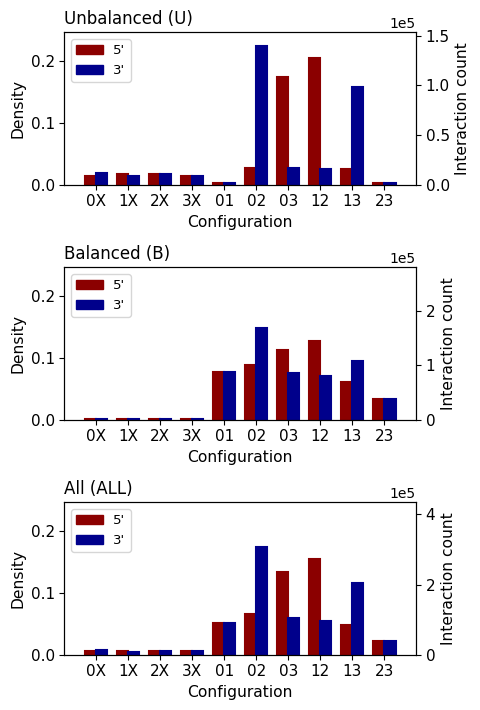

In [13]:
# Use this for CHC data
fig = rtac_Counter.create_configuration_frequency_bar_charts_2(
    conf_freq_dict = CONF_FREQ_DICT,
    i_cats = ['U', 'B', 'ALL'],
    e_cat_1 = 'NE',
    e_cat_2 = 'EN',
    e_cat_1_color = 'darkred',
    e_cat_2_color = 'darkblue',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts_2.pdf'
    )